In [86]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [29]:
disasters_df = pd.read_csv('./1900_2021_DISASTERS.csv', low_memory=False)
disasters_df

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,...,67980.0,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16122,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,South Africa,...,400.0,NaN,400.0,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
16123,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,Congo (the Democratic Republic of the),...,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16124,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Serbia,...,22.0,NaN,22.0,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


In [24]:
disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [118]:
noextra=disasters_df.drop(
    labels = [12856,15875],
    axis = 0,
    inplace = False
)

In [96]:
disasters_unique = noextra['Disaster Subgroup'].unique()
disasters_unique

array(['Climatological', 'Geophysical', 'Meteorological', 'Hydrological',
       'Biological'], dtype=object)

In [98]:
noextra['Disaster Subgroup'].value_counts()

Hydrological      6327
Meteorological    5100
Geophysical       1857
Biological        1598
Climatological    1243
Name: Disaster Subgroup, dtype: int64

In [99]:
x_axis = noextra['Disaster Subgroup'].unique()
y_axis = noextra['Disaster Subgroup'].value_counts()


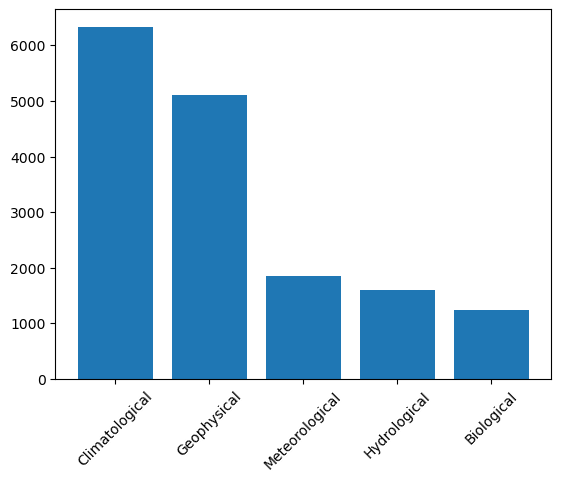

In [100]:
plt.bar(x_axis,y_axis)
plt.xticks(rotation = 45)
plt.show()


In [139]:
richter_data = noextra.set_index('Dis Mag Scale').loc['Richter']
richter_data['Dis Mag Value'].unique()

array([ 8.,  9.,  7.,  6., nan,  3., 10.,  5.,  1.,  4.])

In [141]:
from scipy import stats

x_values = richter_data['Dis Mag Value']
y_values = richter_data['Total Deaths']
#richter_data.plot(kind='scatter',x='Dis Mag Value',y='Total Deaths')

linregress(x_values,y_values)
#plt.scatter(x_values,y_values)
#plt.xticks(rotation = 45)
#plt.show()

NameError: name 'linregress' is not defined

In [125]:
#richter_df = noextra.groupby('Dis Mag Scale')['Richter']
richter_data = noextra.set_index('Dis Mag Scale').loc['Richter']['Dis Mag Value']
richter_NA = richter_data.dropna()
deaths_data = noextra.set_index('Dis Mag Scale').loc['Richter']['Total Deaths']
deaths_data

Dis Mag Scale
Richter     2000.0
Richter    20000.0
Richter    20000.0
Richter      400.0
Richter    12000.0
            ...   
Richter       13.0
Richter       19.0
Richter        NaN
Richter        NaN
Richter        NaN
Name: Total Deaths, Length: 1543, dtype: float64

In [ ]:
richter_data.groupby('Total Deaths').agg(
    total_bill_avg = ('total_bill','mean'), 
    tips_avg = ('tip','mean'), 
    max_table_size = ('size','max')
)


In [ ]:
deaths_data = noextra.set_index('Total Deaths').loc['Richter']['Dis Mag Value']

In [41]:
disasters_df['OFDA Response'].value_counts()

Yes    1694
Name: OFDA Response, dtype: int64

In [7]:
disasters_df.describe()

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,16126.000000,16126.000000,6.770000e+02,4.946000e+03,16126.00000,15739.000000,12498.000000,16126.000000,15418.000000,12570.000000,1.141300e+04,3.895000e+03,9.220000e+03,2.430000e+03,1.161700e+04,1.096000e+03,5.245000e+03,15811.000000
mean,1996.764790,714.784820,1.254136e+05,4.735038e+04,1996.77837,6.444374,15.233957,1996.835607,6.576728,15.775020,2.842866e+03,2.621102e+03,8.823612e+05,7.329314e+04,7.165088e+05,7.986514e+05,7.247835e+05,63.215103
std,20.159065,1929.635089,2.997875e+06,3.094242e+05,20.15571,3.393965,8.953821,20.143010,3.352965,8.865486,6.860595e+04,3.440343e+04,8.573913e+06,5.230058e+05,7.718598e+06,3.057638e+06,4.723131e+06,26.734285
min,1900.000000,1.000000,1.000000e+00,-5.700000e+01,1900.00000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,3.221647
25%,1989.000000,93.000000,1.750000e+02,7.000000e+00,1989.00000,4.000000,7.000000,1989.000000,4.000000,8.000000,6.000000e+00,1.400000e+01,1.244750e+03,5.725000e+02,6.500000e+02,5.000000e+04,8.300000e+03,45.692897
50%,2001.000000,270.000000,7.210000e+02,1.515000e+02,2001.00000,7.000000,15.000000,2001.000000,7.000000,16.000000,2.000000e+01,5.000000e+01,1.000000e+04,3.000000e+03,5.965000e+03,1.725000e+05,6.000000e+04,68.415379
75%,2011.000000,486.000000,3.511000e+03,1.129650e+04,2011.00000,9.000000,23.000000,2011.000000,9.000000,23.000000,6.300000e+01,2.000000e+02,9.182300e+04,1.750000e+04,5.825500e+04,5.000000e+05,3.173000e+05,84.252733
max,2021.000000,9881.000000,7.800000e+07,1.302587e+07,2021.00000,12.000000,31.000000,2021.000000,12.000000,31.000000,3.700000e+06,1.800000e+06,3.300000e+08,1.585000e+07,3.300000e+08,6.000000e+07,2.100000e+08,100.000000


In [8]:
disasters_df['Region'].value_counts()

Southern Asia                2068
South-Eastern Asia           1939
Eastern Asia                 1840
South America                1283
Northern America             1237
Eastern Africa               1159
Central America               823
Western Africa                806
Southern Europe               650
Caribbean                     628
Eastern Europe                547
Western Europe                528
Western Asia                  499
Middle Africa                 428
Northern Africa               345
Australia and New Zealand     326
Melanesia                     258
Northern Europe               212
Southern Africa               208
Central Asia                  144
Polynesia                      94
Russian Federation             60
Micronesia                     44
Name: Region, dtype: int64

In [49]:
disasters_df['Disaster Type'].value_counts()

Flood                    5551
Storm                    4496
Earthquake               1544
Epidemic                 1501
Landslide                 776
Drought                   770
Extreme temperature       603
Wildfire                  471
Volcanic activity         265
Insect infestation         96
Mass movement (dry)        48
Glacial lake outburst       2
Fog                         1
Impact                      1
Animal accident             1
Name: Disaster Type, dtype: int64

In [14]:
disasters_df['Country'].value_counts()

United States of America (the)    1087
China                              980
India                              752
Philippines (the)                  668
Indonesia                          572
                                  ... 
Qatar                                1
Saint Barthélemy                     1
Saint Martin (French Part)           1
Sint Maarten (Dutch part)            1
Isle of Man                          1
Name: Country, Length: 228, dtype: int64

In [13]:
disasters_df.groupby('Region')['Total Deaths'].sum()


Region
Australia and New Zealand        9686.0
Caribbean                      304584.0
Central America                164684.0
Central Asia                     3791.0
Eastern Africa                 817668.0
Eastern Asia                 12816503.0
Eastern Europe                  72951.0
Melanesia                       12148.0
Micronesia                        126.0
Middle Africa                   46912.0
Northern Africa                204402.0
Northern America                96243.0
Northern Europe                  8767.0
Polynesia                         721.0
Russian Federation            3857096.0
South America                  266591.0
South-Eastern Asia             508971.0
Southern Africa                  4412.0
Southern Asia                12559328.0
Southern Europe                168821.0
Western Africa                 360975.0
Western Asia                   108892.0
Western Europe                  51352.0
Name: Total Deaths, dtype: float64

In [15]:
disasters_df.groupby('Start Month')['Total Deaths'].sum()

Start Month
1.0      529443.0
2.0      129847.0
3.0      102289.0
4.0      410357.0
5.0      958653.0
6.0      224971.0
7.0     6799136.0
8.0      344581.0
9.0      405991.0
10.0     491829.0
11.0     452214.0
12.0     827520.0
Name: Total Deaths, dtype: float64

In [16]:
disasters_df.groupby('Start Year')['Total Deaths'].sum()

Start Year
1900    1267500.0
1901     200018.0
1902      48438.0
1903       7136.0
1904        152.0
          ...    
2017      11906.0
2018      15014.0
2019      22455.0
2020      15320.0
2021       9795.0
Name: Total Deaths, Length: 122, dtype: float64

In [50]:
disasters_df.groupby('Start Year')['Event Name'].sum()

Start Year
1900                                      Gastroenteritis
1901                                                    0
1902     Santa MariaSanta MariaMount PeleeMount Soufriere
1903                                       Mount Karthala
1904                                                    0
                              ...                        
2017    Tropical depression'16/Hurricane 'Nate'Hurrica...
2018    EleanorTropical storm 'Alberto'Typhoon 'Maria'...
2019    Cyclone 'Kenneth'Cyclone 'Fani'UbinasCholeraMe...
2020    Storm 'Alex'Hurricane 'Iota'Cyclone 'Yasa'FL-2...
2021    FilomenaHurricane 'Elsa'Tropial cylone 'Niran'...
Name: Event Name, Length: 122, dtype: object

In [47]:
disasters_df.groupby('Region')['Disaster Type'].value_counts()

Region                     Disaster Type      
Australia and New Zealand  Storm                  125
                           Flood                  111
                           Wildfire                44
                           Drought                 13
                           Earthquake              13
                                                 ... 
Western Europe             Wildfire                14
                           Earthquake              11
                           Epidemic                 7
                           Drought                  5
                           Mass movement (dry)      1
Name: Disaster Type, Length: 224, dtype: int64